<h1>Шаг 1: Выгрузка</h1>

In [16]:
#import all necessary libraries
import pandas as pd
from scipy import stats as st
import numpy as np
import seaborn as sns

In [17]:
calls_data = pd.read_csv('/Users/DanilBee/Downloads/Не удалять/Проекты/Для выкладывания/(1)Статистический анализ данных(телеком)/calls.csv')
print(calls_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


In [18]:
internet_data = pd.read_csv('/Users/DanilBee/Downloads//Не удалять/Проекты/Для выкладывания/(1)Статистический анализ данных(телеком)/internet.csv')
print(internet_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


In [19]:
messages_data = pd.read_csv('/Users/DanilBee/Downloads/Не удалять/Проекты/Для выкладывания/(1)Статистический анализ данных(телеком)/messages.csv')
print(messages_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


In [20]:
tariff_data = pd.read_csv('/Users/DanilBee/Downloads/Не удалять/Проекты/Для выкладывания/(1)Статистический анализ данных(телеком)/tariffs.csv')
print(tariff_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


In [21]:
user_data = pd.read_csv('/Users/DanilBee/Downloads/Не удалять/Проекты/Для выкладывания/(1)Статистический анализ данных(телеком)/users.csv')
print(user_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


<h2>Вывод</h2>
    <br>
<ul>
    <li>Проблема 1 с таблицей calls: в <i>duration</i> нужно обработать 0 значения, и привести значение в целочисленный ,с округлением в большую сторону(т.к. по условию 1 секунда разговора = целой минуте)</li>
    <li>Проблема 2 с таблицей calls:  в формате данных нужно столбец id нужно обработать , то есть посмотреть как он меняется , и если меняется значение только после _ ,то можно удалить столбец, и поменять формат времени call_date на datetime</li>
    <li>Проблемы таблицей internet: столбец <i>unnamed0</i> сразу кажется не нужным , так как в данных был за index и поверх него наложился автоматический индекс, и также id нужно обработать также как и в calls. То есть 3 столбца отвечающие за индекс, скорей всего, 2 из них не нужны. Также исправить формат времени session_date на datetime</li>
    <li>Проблемы с таблицей messages: такая же ситуация со столбцом id и форматом времени message_date,который нужно поменять на datetime</li>
    <li>Проблемы с таблицей users: разобраться/обработать столбец churn_date(из условия <i>если значение пропущено, то тариф ещё действовал на момент выгрузки данных</i>). Также сделать user_id index'ом этой таблицы</li>

<h1>Шаг 2: Предобработка

In [22]:
#Calls data

#correction of duration
calls_data.loc[calls_data['duration'] == 0,'duration'] = 1
calls_data['duration'] = np.ceil(calls_data['duration'])
calls_data['duration'] = calls_data['duration'].astype('int')

#correction of call_date
calls_data['call_date'] = pd.to_datetime(calls_data['call_date'],format= '%Y-%m-%d' )

#making correct id
calls_data.set_index('id', inplace = True)

print(calls_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 202607 entries, 1000_0 to 1499_219
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   call_date  202607 non-null  datetime64[ns]
 1   duration   202607 non-null  int64         
 2   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 6.2+ MB
None


In [23]:
#internet_data

#dropping unnecessary column
internet_data.drop(columns=['Unnamed: 0'],inplace = True)

#correction of the session_date
internet_data['session_date'] = pd.to_datetime(internet_data['session_date'],format = '%Y-%m-%d')

#correction of mb_used
internet_data['mb_used'] = np.ceil(internet_data['mb_used'])
internet_data['mb_used'] = internet_data['mb_used'].astype('int')

#making correct id
internet_data.set_index('id', inplace = True)

print(internet_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 149396 entries, 1000_0 to 1499_156
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   mb_used       149396 non-null  int64         
 1   session_date  149396 non-null  datetime64[ns]
 2   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.6+ MB
None


In [24]:
#messages_data

#correction of message_date
messages_data['message_date'] = pd.to_datetime(messages_data['message_date'], format = '%Y-%m-%d')

#making correct id
messages_data.set_index('id', inplace = True)

print(messages_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 123036 entries, 1000_0 to 1499_183
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   message_date  123036 non-null  datetime64[ns]
 1   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.8+ MB
None


In [25]:
#user_data

#correction of churn_date
#filled all of the missing dates with today's date and making it to the string with necessary format using string to get rid of time
user_data['churn_date'].fillna(value = pd.to_datetime('today').strftime('%Y-%m-%d'),inplace=True)
user_data['churn_date'] = pd.to_datetime(user_data['churn_date'], format = '%Y-%m-%d')

#correcion of reg_date
user_data['reg_date'] = pd.to_datetime(user_data['reg_date'], format = '%Y-%m-%d')

#making correct index
user_data.set_index('user_id', inplace = True)

print(user_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1000 to 1499
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   age         500 non-null    int64         
 1   churn_date  500 non-null    datetime64[ns]
 2   city        500 non-null    object        
 3   first_name  500 non-null    object        
 4   last_name   500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 31.2+ KB
None


<h3> Предобработка данных </h3>
<ul>
    <li>Перевели из string в datetime все значения времени, плюс в столбец churn_date добавили значение времени сегодня, так как тариф еще действует</li>
    <li>Округлили данные с продолжительностью разговора и мегабайтов в верхнюю сторону и перевели в формат integer, так как снимают за целые минуты и мегабайты за разговор/сессию</li>
    <li>Также избавились от автоматически сделанных индексов , ведь уникальные индексы , каждой таблицы уже были ,но были записаны как столбец с данными. И в одной из таблицы удалили лишний столбец Unnamed:0, так как он дублировал автоматически созданные индексы</li>

In [26]:
#calls per month calculating

#seperating month data into new column
calls_data['month'] = calls_data['call_date'].dt.month
internet_data['month'] = internet_data['session_date'].dt.month

#calculating quantity of calls per month and their sum of durations by grouping them together by 2 indexes and making one of the indexes back to the column to acces it later on
calls_sum = calls_data.groupby(['user_id', 'month'])['duration'].sum()
calls_sum = calls_sum.reset_index(level = 'month')
calls_sum.columns = ['month','sum_calls']
calls_count = calls_data.groupby(['user_id', 'month'])['duration'].count()
calls_count = calls_count.reset_index(level = 'month')
calls_count.columns = ['month','count_calls']
#merging them together into 1 table to merge with the major one
calls_count = calls_sum.merge(calls_count, on=['user_id','month'])

In [27]:
#messages per month calculating

#seperating month data into new column
messages_data['month'] = messages_data['message_date'].dt.month

#amount of messages sent by the month
messages_count = messages_data.groupby(['user_id','month'])['message_date'].count()
messages_count = messages_count.reset_index(level = 'month')
messages_count.columns = ['month','count_messages']

In [28]:
#megabytes used per month calculating

#seperating month data into new column
internet_data['month'] = internet_data['session_date'].dt.month

#amount of mb were used per month
mb_sum = internet_data.groupby(['user_id','month'])['mb_used'].sum()
mb_sum = mb_sum.reset_index(level = 'month')
mb_sum.columns = ['month','mb_sum']

tariff_data.rename(columns={'tariff_name':'tariff'}, inplace=True)

In [29]:
#getting all the monthly info into 1 table 

useful_data = mb_sum.merge(calls_count, on=['user_id','month'])
useful_data = useful_data.merge(messages_count ,on=['user_id','month'])

users_all_info = user_data.merge(useful_data, on='user_id')

<h3>Первые подсчеты</h3>
<br>
<p> Сначала была идея подсчитать все месячные данные и создать свои DF для каждого случая , то есть таблицу с инфой пользователя и туда merge данные о звонках , и делать отдельные такие таблицы отдельно для каждого случая (<i>закомментировал строки с данной логикой</i>),но мне кажется ,что выборка должна быть репрезантивной(<i>надеюсь ,что все-таки верное решение , а не обратное ему и наоборот не нарушил репрезантативность</i>) , поэтому сделал максимальную выборку , объеденив все данные по пользователям и месяцем в одну , тем самым отбросили около 500 строк с данными ,но получили полноценную таблицу со всеми данными. Теперь можно сделать полноценные расчеты по выручке и работать с данной таблицей как с финальной выборкой

In [30]:
#calculating revenue

users_all_info = users_all_info.merge(tariff_data, on = 'tariff')

In [31]:
#function to calculate revenue 
def revenue(row):
    fee = row['rub_monthly_fee']
    #first part
    count_messages = row['count_messages']
    messages_included = row['messages_included']
    rub_per_message = row['rub_per_message']
    #second part
    sum_calls = row['sum_calls']
    minutes_included = row['minutes_included']
    rub_per_minute = row['rub_per_minute']
    #third part
    mb_sum = row['mb_sum']
    mb_per_month_included = row['mb_per_month_included']
    rub_per_gb = row['rub_per_gb']
    #calculating
    revenue = fee + max((count_messages - messages_included)*rub_per_message,0) + max((sum_calls - minutes_included) * rub_per_minute,0) + max(np.ceil((mb_sum - mb_per_month_included)/1024) * rub_per_gb,0)
    return revenue

users_all_info['revenue'] = users_all_info.apply(revenue, axis=1)

<h3>Вывод</h3>
<br>
<p>Сделали с помощью группровок и метода merge таблицу со всей информацией, включили туда все данные по месяцам для каждого пользователя. Также с помощью merge внесли в таблицу для каждого пользователя данные и о тарифе , для вычисления выручки с клиента по месяцам. Использовали функцию max ,чтобы в случае если в разнице получалось отрицательное значение ,то в результате был 0 , а не какое-то отрицательное число. Также у нас даны данные в мегабайтах за месяц и включенных в тариф , но оплата сверх тарифного плана идет в гигабайтах , и в случае даже ,если пользователь превысил тарифный план на 1мб ,то снимется за весь гигабай , поэтому разницу делим на 1024 и округляем в верхнюю сторону , чтобы получить сколько гигабай он использовал сверх тарифного плана

<h1> Шаг 3: Исследовательский анализ данных</h1>

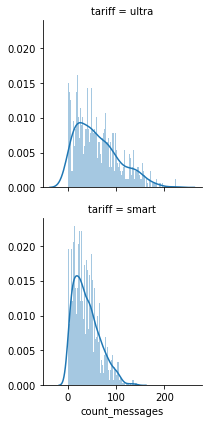

In [32]:
g = sns.FacetGrid(users_all_info, row ='tariff')
g_distplot = g.map(sns.distplot,'count_messages',bins =100)

Строим гистограммы для  сравнения распределения по тарифам ,где находится большее количество сообщений, и посмотреть как  примерно выглядит распределение, и в чем отличие 

/Users/DanilBee/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


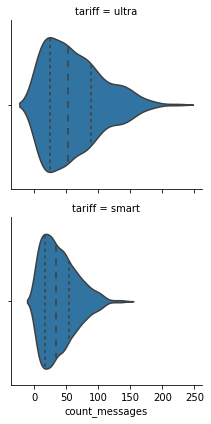

In [33]:
g = sns.FacetGrid(users_all_info, row ='tariff')
g_violin = g.map(sns.violinplot,'count_messages',inner = 'quartile')

С помощью виолончели (viloinplot) смотрим границы ,где находится основные данные , смотрим концетранцию значений и где находятся квартили.  В отличие от boxplot , данные показывают и свое распределение , то есть форма показывает KDE из графика distplot, тем самым на данных графиках еще больше информации в одном

In [34]:
print('Информация по количеству сообщений в месяц , по тарифам:\n')

mean_msg_ultra = users_all_info[users_all_info['tariff'] == 'ultra']['count_messages'].mean()
mean_msg_smart =users_all_info[users_all_info['tariff'] == 'smart']['count_messages'].mean()
print('Среднее тарифа ультра:', mean_msg_ultra)
print('Среднее тарифа смарт:', mean_msg_smart)
print()

disp_msg_ultra = np.var(users_all_info[users_all_info['tariff'] == 'ultra']['count_messages'],ddof = 1)
disp_msg_smart = np.var(users_all_info[users_all_info['tariff'] == 'smart']['count_messages'],ddof = 1)
print('Дисперсия тарифа ультра:', disp_msg_ultra)
print('Дисперсия тарифа смарт:', disp_msg_smart)
print()

std_msg_ultra = np.sqrt(disp_msg_ultra)
std_msg_smart = np.sqrt(disp_msg_smart)
print('Стандартное отклонение тарифа ультра:', std_msg_ultra)
print('Стандартное отклонение тарифа смарт:', std_msg_smart)

Информация по количеству сообщений в месяц , по тарифам:

Среднее тарифа ультра: 61.640957446808514
Среднее тарифа смарт: 38.76710182767624

Дисперсия тарифа ультра: 2008.5500113324103
Дисперсия тарифа смарт: 718.8036193391536

Стандартное отклонение тарифа ультра: 44.81684963640807
Стандартное отклонение тарифа смарт: 26.81051322409091


In [35]:
print('Информация о сообщениях в тарифе УЛЬТРА\n',users_all_info[users_all_info['tariff'] == 'ultra']['count_messages'].describe())
print('Информация о сообщениях в тарифе СМАРТ\n',users_all_info[users_all_info['tariff'] == 'smart']['count_messages'].describe())

Информация о сообщениях в тарифе УЛЬТРА
 count    752.000000
mean      61.640957
std       44.816850
min        1.000000
25%       25.000000
50%       53.000000
75%       89.000000
max      224.000000
Name: count_messages, dtype: float64
Информация о сообщениях в тарифе СМАРТ
 count    1915.000000
mean       38.767102
std        26.810513
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: count_messages, dtype: float64


По графикам гистограм и распределения(виолончель,вместо boxplot ,ибо более подробный график) видно , что  у тарифа Ультра и Смарт графики заметно отличаются:
<ul>
    <li>Ультра более широкий , в то время как Смарт более высокий</li>
    <li>Оба смещены влево</li>
    <li>3 квартиль в тарифе смарт лежит на 55 сообщейний в месяц , что слегка привышает тарифный план</li>
    <li>3 квартиль в тарифе ультра лежит на 89 сообщений в месяц , что даже близко не подходит к тарифному плану , даже если брать максимальное значение выборки - 224 ,то все еще далеко до предела в тарифном плане</li>
    <li>Значения по статистике подтверждают , что разброс намного больше у тарифа ультра , так как там возможности намного больше , чем в смарт </li>
    </ul>
    <br>
Таким образом можно сделать вывод ,что оптимальным количеством сообщений для пользователей тарифа ультра можно установить в 61 <i>(среднее значение)</i> + 44 <i>(стандартное отклонение)</i> * 3 = 61 + 132 = 193 , то есть оптимальным будет установить тариф в 200 сообщений. 
<br>
Также посчитаем оптимальное количество сообщений нужное для пользователей смарт: 38 <i>(среднее значение)</i> + 26 <i>(стандартное отклонение)</i> * 3 = 38 + 78 = 116 сообщений является оптимальным для пользователей смарт ,то есть можно округлить либо до 110 , либо до 120 ,чтобы покрыть нужды всех пользователей
<strong> 
    <ul>
        <li>200 для УЛЬТРА требуется сообщений в месяц</li>
        <li>120 для СМАРТ требуется сообщений в месяц</li>
    </ul>
        </strong>
                    Тем самым для тарифа ультра можно уменьшить тарифный план , а для смарт увеличить 

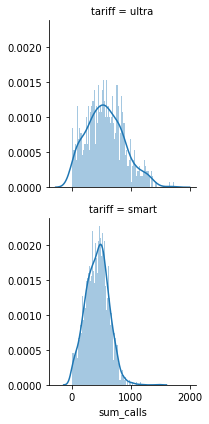

In [36]:
g = sns.FacetGrid(users_all_info, row ='tariff')
g_distplot = g.map(sns.distplot,'sum_calls',bins =100)

Также строим график гистограмм для оценки основного распределения данных по длительности звонков по тарифам

/Users/DanilBee/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


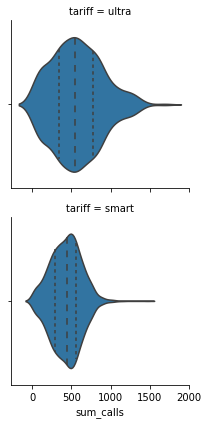

In [37]:
g = sns.FacetGrid(users_all_info, row ='tariff')
g_violin = g.map(sns.violinplot,'sum_calls',inner = 'quartile')

Строим виолончели , сравниваем квартили и распределение относительно их и где вообще лежат данные в целом 

In [38]:
print('Информация по времени разговора в месяц , по тарифам:\n')

mean_call_ultra = users_all_info[users_all_info['tariff'] == 'ultra']['sum_calls'].mean()
mean_call_smart =users_all_info[users_all_info['tariff'] == 'smart']['sum_calls'].mean()
print('Среднее тарифа ультра:', mean_call_ultra)
print('Среднее тарифа смарт:', mean_call_smart)
print()

disp_call_ultra = np.var(users_all_info[users_all_info['tariff'] == 'ultra']['sum_calls'],ddof = 1)
disp_call_smart = np.var(users_all_info[users_all_info['tariff'] == 'smart']['sum_calls'],ddof = 1)
print('Дисперсия тарифа ультра:', disp_msg_ultra)
print('Дисперсия тарифа смарт:', disp_msg_smart)
print()

std_call_ultra = np.sqrt(disp_call_ultra)
std_call_smart = np.sqrt(disp_call_smart)
print('Стандартное отклонение тарифа ультра:', std_call_ultra)
print('Стандартное отклонение тарифа смарт:', std_call_smart)

Информация по времени разговора в месяц , по тарифам:

Среднее тарифа ультра: 571.8457446808511
Среднее тарифа смарт: 432.63759791122715

Дисперсия тарифа ультра: 2008.5500113324103
Дисперсия тарифа смарт: 718.8036193391536

Стандартное отклонение тарифа ультра: 319.8355521742349
Стандартное отклонение тарифа смарт: 192.21825925681233


In [39]:
print('Информация о продолжительности разговоров в тарифе УЛЬТРА\n',users_all_info[users_all_info['tariff'] == 'ultra']['sum_calls'].describe())
print('Информация о продолжительности разговоров в тарифе СМАРТ\n',users_all_info[users_all_info['tariff'] == 'smart']['sum_calls'].describe())

Информация о продолжительности разговоров в тарифе УЛЬТРА
 count     752.000000
mean      571.845745
std       319.835552
min         1.000000
25%       341.000000
50%       551.500000
75%       779.000000
max      1727.000000
Name: sum_calls, dtype: float64
Информация о продолжительности разговоров в тарифе СМАРТ
 count    1915.000000
mean      432.637598
std       192.218259
min         1.000000
25%       295.000000
50%       440.000000
75%       561.500000
max      1471.000000
Name: sum_calls, dtype: float64


Оценивая графики и данные статистики можно сделать данные выводы по длительности звонков:
<ul>
    <li>По гистограмме сразу визуально можно сказать , что среднее значение у них отличается , у тарифа <i>смарт</i> среднее значение более смещено в лево , относительно <i>ультра</i> , посчитав данные, видим , что разница и в правду подтверждается</li>
    <li>Также видно ,что распределение у <i>ультра</i> более широкое ,чем у <i>смарт</i></li>
    <li>В данном случае наблюдаем "по книжке" нормальное распределение без какого-либо смещение</li>
    <li>Квартили <i>ультра</i> от 340(1ый) до 779(3ий), медиана лежит 551</li>
    <li>Квартили <i>смарт</i> от  295(1ый) до 561(3ий), медиана лежит 440</li>
    <li>Сравнивая квартили и графики виолончели можно сделать вывод , что медиана <i>ультра</i> практически на одном уровне с 3 квартилем тарифа <i>смарт</i>. То есть распределения достаточно заметно отличаются , но это логично в связи с возможностями тарифов. В ультра более широкое распределение, в то время как в смарт основная масса распределена в центре и не имеет сильного различия и разброса в данных</li>
    <li>В случае <i>ультра</i> опять же - в выборке нету случаев превышения тарифного плана ,даже при максимальном значении в 1727 </li>
    <li>В случае со <i>смартом</i> ситуация похожа с ситуацией с сообщениями , также большинство пользователей остается в рамках своего тарифного плана</li>
    </ul>
<br>
<p>
    На основе данных заключений и расчетов статистики можно сделать вывод и посчитать сколько требуется минут пользователям определенного трафика в месяц. То есть используя среднее и стандартное отклонение расчитаем нужные показатели : 
    <ul>
        <li>Для тарифа <i>ультра</i> расчитаем: 571 <i>(среднее значение)</i> + 319 <i>(стандартное отклонение)</i>*3 = 571 + 957 = 1528 минут разговора для пользователей <i>ультра</i>. То есть можно округлить ,что для пользователей данного тарифа оптимальным тарифным планом для звонков будет 1550 минут в месяц</li>
        <li>Для тарифа <i>смарт</i> расчитаем: 432 <i>(среднее значение)</i> + 192 <i>(стандартное отклонение)</i>*3 = 432 + 576 = 1008 минут разговора для пользователей <i>смарта</i>. То есть можно округлить ,что для пользователей данного тарифа оптимальным тарифным планом для звонков будет 1000 минут в месяц</li>
        </ul>
        <strong> 
    <ul>
        <li>1550 для УЛЬТРА требуется минут разговора в месяц</li>
        <li>1000 для СМАРТ требуется минут разговора в месяц</li>
    </ul>
        </strong>

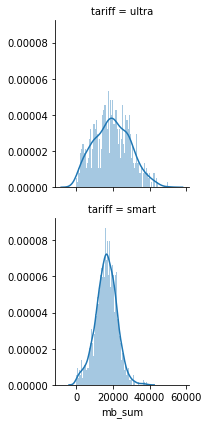

In [40]:
g = sns.FacetGrid(users_all_info, row ='tariff')
g_distplot = g.map(sns.distplot,'mb_sum',bins =100)

Видна такая же ситуация,что распределение нормальное и нету какого-либо смещения

/Users/DanilBee/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


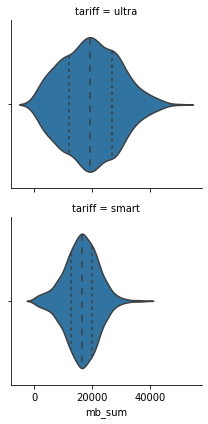

In [41]:
g = sns.FacetGrid(users_all_info, row ='tariff')
g_violin = g.map(sns.violinplot,'mb_sum',inner = 'quartile')

Строим виолончели , сравниваем квартили и распределение относительно их и где вообще лежат данные в целом . Видно ,что ситуация напоминает со звонками в отношении положения квартилей. Будем смотреть с помощью статистических показателей данное предположение

In [42]:
print('Информация об объеме потраченного интернет трафика в тарифе УЛЬТРА\n',users_all_info[users_all_info['tariff'] == 'ultra']['mb_sum'].describe())
print('Информация об объеме потраченного интернет трафика в тарифе СМАРТ\n',users_all_info[users_all_info['tariff'] == 'smart']['mb_sum'].describe())

Информация об объеме потраченного интернет трафика в тарифе УЛЬТРА
 count      752.000000
mean     19614.590426
std       9638.192361
min          0.000000
25%      11917.000000
50%      19463.500000
75%      26854.750000
max      49789.000000
Name: mb_sum, dtype: float64
Информация об объеме потраченного интернет трафика в тарифе СМАРТ
 count     1915.000000
mean     16266.113316
std       5800.037364
min          0.000000
25%      12640.000000
50%      16484.000000
75%      20068.000000
max      38610.000000
Name: mb_sum, dtype: float64


In [43]:
print('Информация по времени разговора в месяц , по тарифам:\n')

mean_int_ultra = users_all_info[users_all_info['tariff'] == 'ultra']['mb_sum'].mean()
mean_int_smart =users_all_info[users_all_info['tariff'] == 'smart']['mb_sum'].mean()
print('Среднее тарифа ультра:', mean_int_ultra)
print('Среднее тарифа смарт:', mean_int_smart)
print()

disp_int_ultra = np.var(users_all_info[users_all_info['tariff'] == 'ultra']['mb_sum'],ddof = 1)
disp_int_smart = np.var(users_all_info[users_all_info['tariff'] == 'smart']['mb_sum'],ddof = 1)
print('Дисперсия тарифа ультра:', disp_int_ultra)
print('Дисперсия тарифа смарт:', disp_int_smart)
print()

std_int_ultra = np.sqrt(disp_int_ultra)
std_int_smart = np.sqrt(disp_int_smart)
print('Стандартное отклонение тарифа ультра:', std_int_ultra)
print('Стандартное отклонение тарифа смарт:', std_int_smart)

Информация по времени разговора в месяц , по тарифам:

Среднее тарифа ультра: 19614.590425531915
Среднее тарифа смарт: 16266.113315926894

Дисперсия тарифа ультра: 92894751.98382299
Дисперсия тарифа смарт: 33640433.42027715

Стандартное отклонение тарифа ультра: 9638.19236080205
Стандартное отклонение тарифа смарт: 5800.037363696647


Оценивая графики и данные статистики можно сделать данные выводы по расходаванию мегабайтов в месяц:
<ul>
    <li>По гистограммам опять же видно , что в случае со <i>смартом</i> , распределение больше сосредоточено в центре , чем  в <i>ультра</i></li>
    <li>По поводу среднего значения по графикам можно сказать , что они примерно одинаковы и на первый взгляд находятся друг-от-друга  с незначительной разницей,но посчитав статистику  увидели ,что на самом деле разница велика 19614 в <i>ультра</i> и 16266 в <i>смарт</i></li>
    <li>Обе гистограммы являются нормальными распределениями</li>
    <li>С квартилями наблюдаем похожую ситуацию как и со звонками , что 3 квартиль <i>смарта</i> практически совпадает с медианой <i>ультра</i></li>
    <li>В этот раз в случае с <i>ультра</i> уже идет у некоторых пользователей превышение тарифного плана. По тарифу 30720 мб в месяц , а у некоторых пользователей доходит до 49789 мб ,что превышает тариф почти на 19гб</li>
    <li>В случае со <i>смартом</i> более 50% пользователей превышает тарифный план , а некоторые пользователи превышают тарифный план даже тарифа ультра на несколько гб</li>
    </ul>
<br>
    
<p>
    На основе данных заключений и расчетов статистики можно сделать вывод и посчитать сколько требуется мегабайт пользователям определенного трафика в месяц. То есть используя среднее и стандартное отклонение расчитаем нужные показатели : 
    <ul>
        <li>Для тарифа <i>ультра</i> расчитаем: 19614 <i>(среднее значение)</i> + 9638 <i>(стандартное отклонение)</i>*3 = 19614 + 28914 = 168528 мб интернет трафика для пользователей <i>ультра</i> нужно ,чтобы всем хватало. То есть можно округлить ,что для пользователей данного тарифа оптимальным тарифным планом для интернета будет 164 гб в месяц</li>
        <li>Для тарифа <i>смарт</i> расчитаем: 16266 <i>(среднее значение)</i> + 5800 <i>(стандартное отклонение)</i>*3 = 16266 + 17400 = 33666 мб интернет трафика для пользователей <i>смарта</i>. То есть можно округлить ,что для пользователей данного тарифа оптимальным тарифным планом для интернета будет 32 гб в месяц</li>
        </ul>
        <strong> 
    <ul>
        <li>164 для УЛЬТРА требуется гб интернет трафика в месяц</li>
        <li>32 для СМАРТ требуется гб интернет трафика в месяц</li>
    </ul>
        </strong>

<h3>Вывод:</h3>

<h1>Шаг 4: Гипотезы

Сформулируем гипотезы:
<ul>
    <li>Для гипотезы ,что средняя <strong>выручка пользователей тарифов <i>«Ультра» и «Смарт»</i> различается</strong>, делаем гипотезы ,которая говорит обратное , то есть H<sub>0</sub>:  df['ultra_revenue'] = df['smart_revenue'] , а гипотеза H<sub>1</sub> будем говорить об обратном ,что значение изменилось , и не важно в какую сторону , поэтому проверяет просто по формуле p value</li>
    <li>Для гипотезы,что средняя <strong>выручка пользователей из <i>Москвы</i> отличается от выручки пользователей из <i>других регионов</i></strong> , также предпологаем гипотезу , которая говорит обратное -  H<sub>0</sub>:  df[df['city']=='Москва'] = df[df['city'] != 'Москва'] , а гипотеза H<sub>1</sub> будем говорить об обратном ,что значение изменилось , и не важно в какую сторону , поэтому проверяет просто по формуле p value</li>
    <li> за альфу принито брать значение в 0.05 ,то есть при p value < 5% мы отвергаем ( но не отрицаем ) гипотезу H<sub>0</sub>

In [44]:
#declare alpha value 5%
alpha = 0.05
users_ultra = users_all_info[users_all_info['tariff'] == 'ultra']
users_smart = users_all_info[users_all_info['tariff'] == 'smart']

In [45]:
#checking hypothesis 1

ttest_result_1 = st.ttest_ind(users_ultra['revenue'],users_smart['revenue'])

print('p-значение:',ttest_result_1.pvalue)

if (ttest_result_1.pvalue<alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.944992219485207e-111
Отвергаем нулевую гипотезу


In [46]:
#checking hypothesis 2

ttest_result_2 = st.ttest_ind( users_all_info[users_all_info['city'] == 'Москва']['revenue'],users_all_info[users_all_info['city'] != 'Москва']['revenue'])
print('p-значение:',ttest_result_2.pvalue)

if (ttest_result_2.pvalue<alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1517605791788797
Не получилось отвергнуть нулевую гипотезу


<h2>Вывод</h2>
<br>
<strong>Гипотеза 1:</strong> выручка отличается в тарифе <i>Ультра</i> от тарифа <i>Смарт</i>
<br>
<br>
Полученное значение p-value говорит о том, что разница в средней выручке между тарифами отличается и это можно утверждать с достаточной большой уверенностью ,ведь полученное значение получилось очень малым.Поэтому H<sub>0</sub> можем с большой ,очень большой уверенностью отвергнуть(но не отрицать)
<br>
<br>
<strong>Гипотеза 2:</strong> выручка не отличается в городе Москва от остальных городов
<br>
<br>
Полученное значение p-value говорит о том, что хотя средняя выручка пришедших из Москвы и других городов и неодинакова, с вероятностью в  15%+ такое различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними выручками.Поэтому H<sub>0</sub> не можем отвергнуть(но не отрицать)

<h1>Шаг 5: Общий вывод</h1>

<h2>Вывод</h2>
<br>
<p> Проделали большую работу с данными, сначала мы предобработали данные , заполнив данные логическими заполнениями. Также изменили типы данных: на временные , с вещественных на целочисленные (т.к. операторы жадные<i>:)</i> округляли все значения в верх) Также избавились от лишних столбцов , многие из них уже имели идентификаторы , и много было лишних столбцов, так что ,некоторые столбцы сделали новыми идентификаторами , а в некоторых случаях просто удалили.
<br>
После предобработки занялись вычилениями полезных показателей -  расчитали данные по месяцам , делали с помощью метода groupby ,где в результате получался Series с мультииндексом , и один из индексов('month') перевели обратно в столбец. Далее объеденяли их в общие данные для пользователей , в результате потеряли какие-то данные, но добились репрезентативности выборки с которой можно работать. После того как получили все данные , с помощью функции вычислили для каждого пользователя сколько в месяц он тратит денег ( выручку для компании )
<br>
    <br>
Далее с помощью графиков и статистических показателей посмотрели распределение данных по использованным пользователем показателей по тарифам , так мы увидели с помощью гистограмм , что все данные распределены нормально , только показатель сообщений имеет отличительные скошенности вправую сторону. С помощью виолончели наблюдали визуально более подробно как распределены данные относительно всего массива , так подметили разницу в квартилях и как основная масса людей использует возможности тарифов. Далее подтвердить данные и высчитать нужные показатели ,чтобы понять сколько нужно определенного ресурса(количество сообщений , объем интернет трафика, количество минут) в среднем всем пользователем тарифа . Сделали на основе ,что среднее значение + 3*стандартное отклонение покрывает 99% пользователей. Самым основным было , что у тарифа Смарт основное количество пользователей сосредоточенно достаточно близко к среднему значению на всех графиках , в отличие от Ультра ,где графики более широкие ,что также подтверджает дисперсия. По всем этим данным можно сделать вывод ,что пользователем тарифа Ультра хватает своих возможностей с головой , и большая часть из них даже близко не подходит к границам тарифного плана , в то время как в Смарт хоть и все данные сосредоточены более узко , но почти все они на грани со своим тарифным планом и есть немалая часть за границами тарифного плана , но как правило с небольшим перебором. Основная выручка сразу видно идет с объема интернет трафика,ведь пользователям обоих тарифных планах катострафически не хватает интернет трафика и многие уходят за его границы и платят по высокому дополнительному пакету за 1 гб
<br>
Выдвигаем 2 гипотезы, обе гипотезы проверяли T тестом для 2 не связанных совокупностей 
<br>
    <br>
<strong>Гипотеза 1:</strong> выручка отличается в тарифе <i>Ультра</i> от тарифа <i>Смарт</i>
<br>
<br>
Выолнили T тест ,где получили p значение , на основе которого получили данные для того ,чтобы отвергнуть H<sub>0</sub> гипотезу, и придерживаться H<sub>1</sub>,которая говорит о том , что разница в выручке в тарифах есть
<br>
<br>
<strong>Гипотеза 2:</strong> выручка не отличается в городе Москва от остальных городов
<br>
<br>
Также выполнили T тест,где значение p дало понять что хоть и есть основы полагать ,что выручка отличается Москвы от остальных городов, но с таким процентом мы вполне могли получить случайно и с нашей установленной стандартом alpha в 5% , мы не может отвергнуть H<sub>0</sub> гипотезу